# National University of Singapore SMS Analysis

In this notebook, we will analyze **The National University of Singapore SMS Corpus dataset**

This dataset contains thousands of text messages (SMSs) taken from the corpus and is mostly comprised of messages from Singaporeans and students attending the University.

# Loading the dataset

In [1]:
import pandas as pd

# Load the data
sms_df = pd.read_csv('./clean_nus_sms.csv')
sms_df.head()

,Unnamed: 0,id,Message,length,country,Date
0,0,10120,Bugis oso near wat...,21,SG,2003/4
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4
4,4,10124,Meet after lunch la...,22,SG,2003/4


## Dataset Describtion
The dataset contains 5 features
- **id**: Unique identifier for every sms
- **Message**: The actual text sent in the SMS in natural language
- **length**: The number of charcters in the message
- **country**: Country the sender is from
- **Date**: Month and year the message was sent

The dataframe contains an unnamed column that is useless for us as it is the same as the row number; thus, we will drop it.

In [2]:
sms_df.drop(['Unnamed: 0'], axis=1, inplace=True)
sms_df.head()

,id,Message,length,country,Date
0,10120,Bugis oso near wat...,21,SG,2003/4
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4
4,10124,Meet after lunch la...,22,SG,2003/4


# Data Inspection and Exploration

## Date Inspection
Let's check the distribution of the messages sent over time.

In [3]:
sms_df['Date'].value_counts()

Date
2011/3     10435
2003/4      9807
2011/4      5754
2011/12     5597
2011/11     4040
2011/1      3647
2011/2      3633
2014/9      2323
2010/11      917
2010/12      562
2011/8       265
2015/2       260
2014/11      235
2012/3       163
2012/5       150
2012/7       147
2011/5       110
2011/9       107
2012/2        93
2011/6        73
2015/3        57
2013/5        55
2012/8        53
2014/12       50
2012/6        35
2012/4        20
2012/10       10
Name: count, dtype: int64

In [4]:
sms_df['year'] = sms_df['Date'].apply(lambda x: x[:4])
sms_df['year'].value_counts() / sms_df['year'].value_counts().sum() 

year
2011    0.692642
2003    0.201798
2014    0.053665
2010    0.030433
2012    0.013807
2015    0.006523
2013    0.001132
Name: count, dtype: float64

The data isn't fairly distributed over time with around 90% of the messages being sent in either 2011 or 2003

## Country Inspection
Let's check the countries of the users

In [5]:
sms_df['country'].value_counts()

country
Singapore              22013
SG                      9806
India                   6901
United States           3749
USA                     1932
Sri Lanka               1017
Malaysia                 766
Pakistan                 751
unknown                  602
Canada                   198
Bangladesh               126
China                    107
india                    105
INDIA                     79
Philippines               67
Indonesia                 48
Nepal                     39
srilanka                  30
United Kingdom            30
Hungary                   28
Serbia                    22
Kenya                     20
Ghana                     18
Italia                    10
Turkey                    10
Trinidad and Tobago       10
Lebanon                   10
Slovenia                  10
Nigeria                   10
New Zealand               10
Macedonia                 10
UK                        10
Morocco                    9
Romania                    9
Austra

Clearly this feature isn't clean. We see Singapore sometimes referred to as Singapore and sometimes as SG. The same goes for the US which is referred to by both US and United States.

Cleanning all of this is a difficult task but it is probably not useful since it seems like most messages are from Singapore. To be sure, let's check the percentage of messages sent from Singapore.

In [6]:
len(sms_df[(sms_df['country'] == 'SG') | (sms_df['country'] == 'Singapore')]) / len(sms_df)

0.6547388781431335

As we can see around 65% percent of the SMS messages were sent from Singapore so we can create a new binary feature called from_singapore that I expect will be more useful than country.

In [7]:
sms_df['from_singapore'] = sms_df['country'].apply(lambda x: 1 if x == 'SG' or x == 'Singapore' else 0)
sms_df['from_singapore'].value_counts()

from_singapore
1    31819
0    16779
Name: count, dtype: int64

# Messages Analysis


Let's know start analyzing the text messages themselves. We will start by tokenizing and normalizing the text

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

def preproccess_message(message):
  
  # Convert the message to lowercase
  message = message.lower()
  
  # Tokenize the message
  tokens = word_tokenize(message)

  # Remove stop words
  stop_words = set(stopwords.words('english'))
  no_stop_words = [word for word in tokens if word not in stop_words]

  # Remove punctuation
  no_punctuation = [word for word in no_stop_words if word not in string.punctuation]

  # Remove numbers
  no_numbers = [word for word in no_punctuation if not word.isdigit()]

  # Remove single characters
  no_single_chars = [word for word in no_numbers if len(word) > 1]

  # Remove non-alphabetic characters
  no_non_alpha = [word for word in no_single_chars if word.isalpha()]

  # Lemmatize the words
  lemmatizer = WordNetLemmatizer()
  lemmatized = [lemmatizer.lemmatize(word) for word in no_non_alpha]
  
  return lemmatized

sms_df['Message'] = sms_df['Message'].astype(str)
sms_df['proccessed_message'] = sms_df['Message'].apply(preproccess_message)
words = [word for message in sms_df['proccessed_message'].values for word in message]

print(sms_df['proccessed_message'].head())
print(words[:10])

0                              [bugis, oso, near, wat]
1    [go, jurong, point, crazy, available, bugis, g...
2                      [dunno, let, go, learn, pilate]
3    [den, weekday, got, special, price, haiz, cant...
4                                    [meet, lunch, la]
Name: proccessed_message, dtype: object
['bugis', 'oso', 'near', 'wat', 'go', 'jurong', 'point', 'crazy', 'available', 'bugis']


Let's create wordcloud from the words to visualize the most repeating words in the messages.

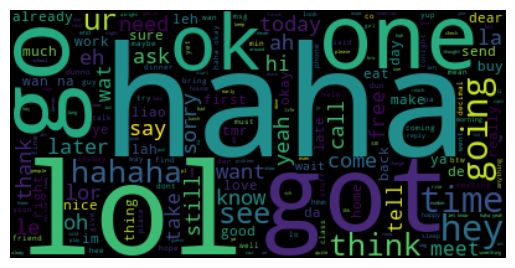

[('haha', 6760),
 ('go', 3368),
 ('lol', 3040),
 ('got', 2608),
 ('time', 2097),
 ('ok', 2010),
 ('hahaha', 1742),
 ('okay', 1721),
 ('ur', 1674),
 ('le', 1596)]

In [9]:
# Create Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(' '.join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Find the most common words
from collections import Counter
word_counts = Counter(words)
word_counts.most_common(10)

I see haha, lol, and hahaha in the list. It is great to know that people still laugh :-)

Now let's add part of speech tagging to get more detailed insight about the most used words.

In [10]:
# POS tagging
from nltk import pos_tag
sms_df['tagged_message'] = sms_df['proccessed_message'].apply(pos_tag)
sms_df['tagged_message'].head()

0      [(bugis, NN), (oso, NN), (near, IN), (wat, NN)]
1    [(go, VB), (jurong, JJ), (point, NN), (crazy, ...
2    [(dunno, NN), (let, NN), (go, VB), (learn, JJ)...
3    [(den, JJ), (weekday, NN), (got, VBD), (specia...
4                  [(meet, NN), (lunch, NN), (la, NN)]
Name: tagged_message, dtype: object

I will start by analyzing the most common nouns in the messages

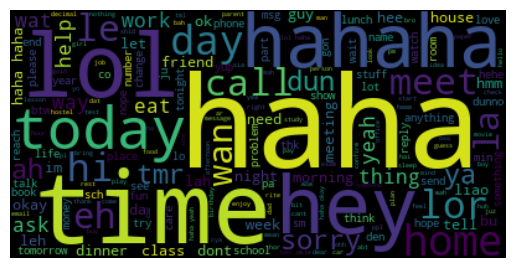

[('haha', 5580),
 ('lol', 2116),
 ('time', 2097),
 ('hahaha', 1402),
 ('home', 1253),
 ('hey', 1251),
 ('le', 1152),
 ('day', 1102),
 ('today', 1034),
 ('hi', 1008)]

In [11]:
sms_df['nouns'] = sms_df['tagged_message'].apply(lambda x: [word[0] for word in x if word[1] == 'NN'])

nouns_wordcloud = WordCloud().generate(' '.join([word for message in sms_df['nouns'].values for word in message]))
plt.imshow(nouns_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Find the most common nouns
nouns = [word for message in sms_df['nouns'].values for word in message]
noun_counts = Counter(nouns)
noun_counts.most_common(10)

Thankfully, all the words are positive.

Now let's check the noun phrases.

In [12]:
from nltk import RegexpParser

def get_noun_phrases(tagged_message):
  if(len(tagged_message) == 0):
    return []
  np_chunk_grammar = "NP: {<DT>?<JJ>.*<NN>}"
  np_chunk_parser = RegexpParser(np_chunk_grammar)
  chunked_text =  np_chunk_parser.parse(tagged_message)
  noun_phrases = []
  for subtree in chunked_text.subtrees():
    if subtree.label() == 'NP':
      phrase = " ".join([word[0] for word in subtree.leaves()])
      noun_phrases.append(phrase)  
  return noun_phrases

sms_df['noun_phrases'] = sms_df['tagged_message'].apply(get_noun_phrases)

# Find the most common noun phrases
noun_phrases = [word for message in sms_df['noun_phrases'].values for word in message]
noun_phrase_counts = Counter(noun_phrases)
noun_phrase_counts.most_common(10)

[('wat time', 153),
 ('new year', 148),
 ('next time', 145),
 ('good morning', 138),
 ('good night', 104),
 ('happy birthday', 102),
 ('next week', 100),
 ('last time', 71),
 ('decimal pm', 68),
 ('good luck', 58)]

Seems like a lot of message are used for greeting or congratulating others on events.

Let's see the most common verb phrases

In [13]:
def get_verb_phrases(tagged_message):
  if(len(tagged_message) == 0):
    return []
  vp_chunk_grammar = "VP: {<VB.*><DT>?<JJ>*<NN>}"
  vp_chunk_parser = RegexpParser(vp_chunk_grammar)
  chunked_text =  vp_chunk_parser.parse(tagged_message)
  verb_phrases = []
  for subtree in chunked_text.subtrees():
    if subtree.label() == 'VP':
      phrase = " ".join([word[0] for word in subtree.leaves()])
      verb_phrases.append(phrase)  
  return verb_phrases

sms_df['verb_phrases'] = sms_df['tagged_message'].apply(get_verb_phrases)

# Find the most common verb phrases
verb_phrases = [word for message in sms_df['verb_phrases'].values for word in message]
verb_phrase_counts = Counter(verb_phrases)
verb_phrase_counts.most_common(10)

[('take care', 138),
 ('go home', 131),
 ('reached home', 64),
 ('going home', 62),
 ('blessed day', 52),
 ('go eat', 44),
 ('come home', 43),
 ('reach home', 35),
 ('get home', 35),
 ('got time', 34)]

Coming and home seems like an important part of most messages.

# Sentiment Analysis

## Sentiment Categorization

I will first start by categorizing each message as either positive, negative, or neutral.

In [14]:
# Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

sentiment_analyzer = SentimentIntensityAnalyzer()

def get_sentiment(message):
  sentiment_score = sentiment_analyzer.polarity_scores(message)
  if sentiment_score['compound'] > 0.05:
    return 'positive'
  elif sentiment_score['compound'] < -0.05:
    return 'negative'
  else:
    return 'neutral'

sms_df['sentiment'] = sms_df['Message'].apply(get_sentiment)
sms_df['sentiment'].head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ibrahim/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0     neutral
1    positive
2     neutral
3    positive
4     neutral
Name: sentiment, dtype: object

Now let's see which sentiment is most common

In [15]:
sms_df['sentiment'].value_counts(normalize=True)

sentiment
positive    0.442076
neutral     0.441047
negative    0.116877
Name: proportion, dtype: float64

Thankfully, most messages are positive and very few are negative.

Let's visualize these results.

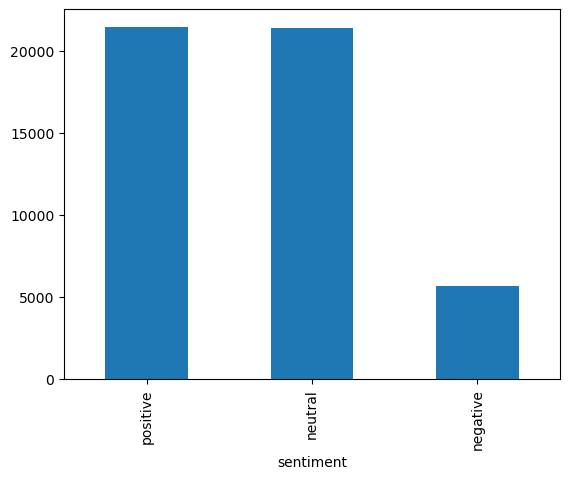

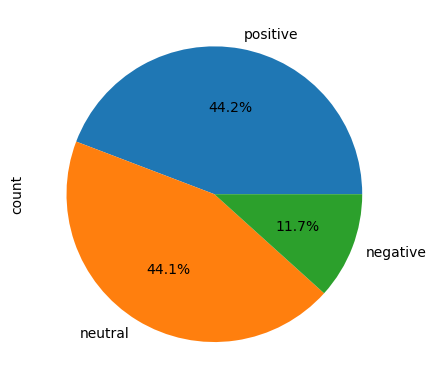

<Figure size 640x480 with 0 Axes>

In [16]:
# Sentiment Bar Chart
sms_df['sentiment'].value_counts().plot(kind='bar')
plt.show()
plt.clf()

# Sentiment Pie Chart
sms_df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()
plt.clf()

## Sentiment by Country

Let's see if the results change between singaporians and non-singaporians

In [17]:
print(sms_df[sms_df['from_singapore']==1]['sentiment'].value_counts(normalize=True))
print(sms_df[sms_df['from_singapore']==0]['sentiment'].value_counts(normalize=True))

sentiment
positive    0.468619
neutral     0.417895
negative    0.113486
Name: proportion, dtype: float64
sentiment
neutral     0.484951
positive    0.391740
negative    0.123309
Name: proportion, dtype: float64


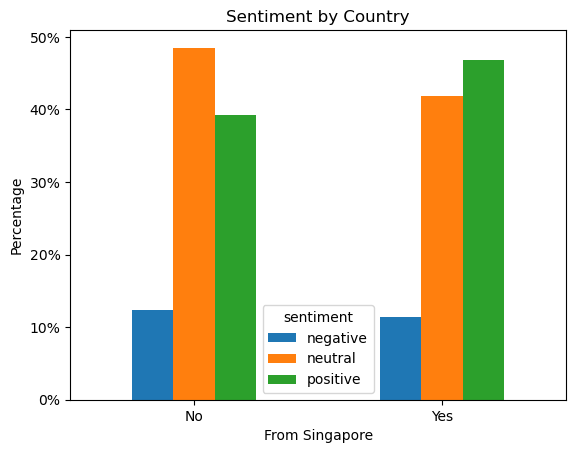

<Figure size 640x480 with 0 Axes>

In [18]:
# Sentiment by country
axes = sms_df.groupby(['from_singapore']).sentiment.value_counts(normalize=True).unstack().plot(kind='bar')
axes.set_ylabel('Percentage')
axes.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: "{:.0f}%".format(x*100)))
axes.set_xlabel('From Singapore')
axes.xaxis.set_tick_params(rotation=0)
axes.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: 'Yes' if x == 1 else 'No'))
plt.title('Sentiment by Country')
plt.show()
plt.clf()

It seems that Singaporians are more happy than others.

## Sentiment Over Time

Now let's analyze the sentiment change over time.

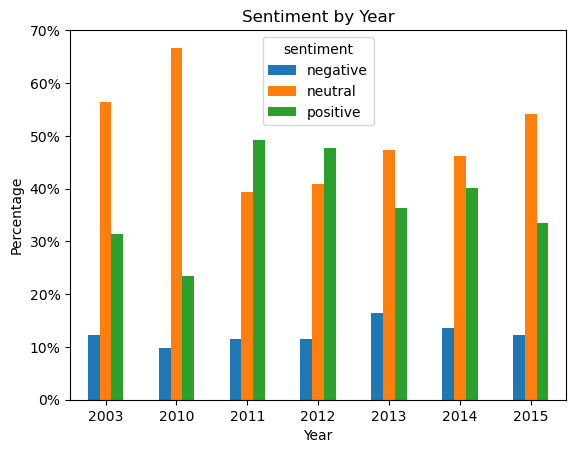

<Figure size 640x480 with 0 Axes>

In [19]:
# Sentiment by year
axes = sms_df.groupby(['year']).sentiment.value_counts(normalize=True).unstack().plot(kind='bar')
axes.set_ylabel('Percentage')
axes.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: "{:.0f}%".format(x*100)))
axes.set_xlabel('Year')
axes.xaxis.set_tick_params(rotation=0)
plt.title('Sentiment by Year')
plt.show()
plt.clf()

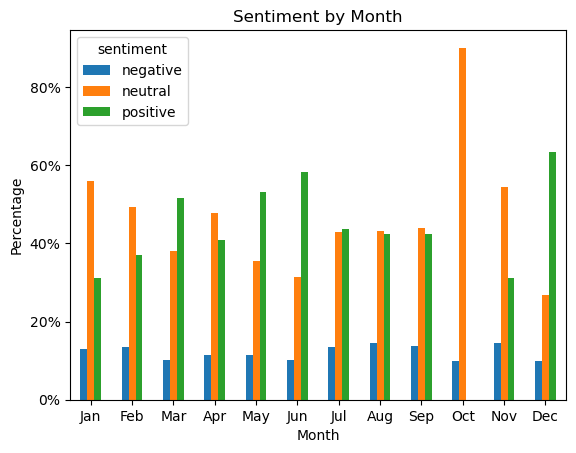

<Figure size 640x480 with 0 Axes>

In [20]:
# Sentiment by month
sms_df['month'] = sms_df['Date'].apply(lambda x: x[5:]).astype(int)
axes = sms_df.groupby(['month']).sentiment.value_counts(normalize=True).unstack().sort_index().plot(kind='bar')
axes.set_ylabel('Percentage')
axes.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: "{:.0f}%".format(x*100)))
axes.set_xlabel('Month')
axes.xaxis.set_tick_params(rotation=0)
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: month_labels[x]))
plt.title('Sentiment by Month')
plt.show()
plt.clf()

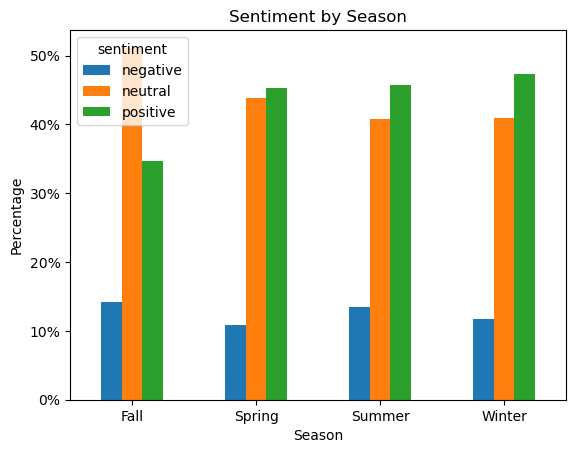

<Figure size 640x480 with 0 Axes>

In [21]:
# Sentiment by Season
sms_df['season'] = sms_df['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Fall')
axes = sms_df.groupby(['season']).sentiment.value_counts(normalize=True).unstack().plot(kind='bar')
axes.set_ylabel('Percentage')
axes.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: "{:.0f}%".format(x*100)))
axes.set_xlabel('Season')
axes.xaxis.set_tick_params(rotation=0)
plt.title('Sentiment by Season')
plt.show()
plt.clf()

# Conclusion

In this analysis of **The National University of Singapore SMS Corpus dataset**, we have explored a dataset containing thousands of text messages, primarily from Singaporeans and students at the University. The dataset was loaded and examined, revealing five key features: `id`, `Message`, `length`, `country`, and `Date`. These features provided insights into the nature of the messages, their origin, and the time frame they were sent.

The messages in the dataset span various lengths and originate from Singapore, as indicated by the `country` column. The `Date` column suggests that the messages were collected over a period, providing a temporal dimension to the analysis.

After examining the dataset we began analyzing the text messages to gain insight into the communication pattern and daily lifestyle of the population from which these messages were sampled. Some of the inferences include:

1. **Informal Communication**: Some of the most commonly used words in the messages were "haha", "lol, and "hahaha". This also suggests that humor is an important part of the discussions of the studied population.

2. **Focus on Daily Activities**: The repetition of the verb phrases "reached home", "come home", and "go eat" suggests that the population mostly SMS each other about their daily needs and concerns.

3. **Consideration of Time**: Time is a major theme in the messages and this is evident by the repeated use of the phrases "wat time", "next time", "next week", and "last time".

4. **Importance of Social Events**: Social events seem to be an important reason for many messages since many messages repeat the phrases "new year" and "happy birthday".


We moved on and analyzed the sentiment of the messages and concluded that most messages are positive followed by neutral messages. Moreover, messages originating from Singaporian people are more positive than those people of other nationalities. Furthermore, the number of positive messages declines more in fall than in any other season.
